# t-SNE of Breast Cancer Data

## About the Dataset

This project uses the GSE45827 dataset from the Curated Microarray Database (CuMiDa), which contains breast cancer gene expression data. The dataset includes:

- **6 Classes**: Different types of breast cancer and healthy tissue.
- **54,676 Genes**: Gene expression levels measured across samples.
- **151 Samples**: Each row represents a sample, and each column represents a gene.

### Dataset Source

CuMiDa is a carefully curated repository containing 78 cancer microarray datasets specifically designed for machine learning research. These datasets have been selected from over 30,000 studies in the Gene Expression Omnibus (GEO) and have undergone extensive biological preprocessing, including background correction and normalization, to ensure data reliability.

The GSE45827 dataset, like others in CuMiDa, is intended to serve as a reliable source for computational research, providing preprocessed data along with benchmark results for machine learning studies in cancer research. The dataset is available in various formats, including CSV, TAB, and ARFF, and also includes PCA and t-SNE results.

More details and the dataset are available at the official CuMiDa website under the ID GSE45827: [CuMiDa - GSE45827](http://sbcb.inf.ufrgs.br/cumida).

## Project Overview

This project focuses on applying t-SNE (t-distributed Stochastic Neighbor Embedding), a machine learning technique for dimensionality reduction, to visualize the gene expression data from the GSE45827 dataset. The goal is to represent the high-dimensional gene expression data in a 2D space, making it easier to observe patterns and similarities between different types of breast cancer.

## Source

This dataset is available on Kaggle in the following link:
> https://www.kaggle.com/datasets/brunogrisci/breast-cancer-gene-expression-cumida/data


## Data Dictionary

- **samples**: This is the unique ID of each sample. This is numeric.
- **type**: This is the type of breast cancer. It contanins 5 types of cancer and *normal* represents the healthy tissue. This is categorical.
- **1007_s_at** to **AFFX-TrpnX-M_at**: These features represent genes expression levels measured across each sample. These are numeric.

## Problem Statement

1. **Exploratory Data Analysis(EDA)**: The objective of EDA is to analyze the data, uncover patterns and relationships among the features to detect the calss or type of breast cancer.
2. **t-SNE**: It reduces the dimension of the dataset and visualize each type of cancer efficiently as the dataset is very high dimensional.

### Load Libraries

In [14]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Other
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

### Settings

In [2]:
# Warning
warnings.filterwarnings("ignore")

# Plotting
sns.set_style("darkgrid")

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "Breast_GSE45827.csv")

### Load Data

In [3]:
df = pd.read_csv(csv_path)

### General Information

In [4]:
# Show 1st 5 rows of dataset to get an idea about the data stored in each attribute
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [5]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DESCRIPTION
Number of observations: 151
Number of features: 54677


In [6]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
print("-" * 60)
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
num_cols = [col for col in df.columns if df[col].dtype != "object"]
print(f"Number of categorical features: {len(cat_cols)}")
print(f"Number of numerical features: {len(num_cols)}")

FEATURE DESCRIPTION
samples              int64
type                object
1007_s_at          float64
1053_at            float64
117_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 54677, dtype: object
------------------------------------------------------------
Number of categorical features: 1
Number of numerical features: 54676


In [7]:
# Missing value detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("No missing value present in any feature of these observations.")

MISSING VALUE DETECTION
No missing value present in any feature of these observations.


In [8]:
# Duplicate row detection
print("=" * 60)
print("DUPLICATE ROW DETECTION")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DUPLICATE ROW DETECTION
Number of duplicate rows: 0


In [11]:
# Check the type distribution
df["type"].value_counts()

type
basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: count, dtype: int64

Text(0.5, 1.0, 'Type Distribution')

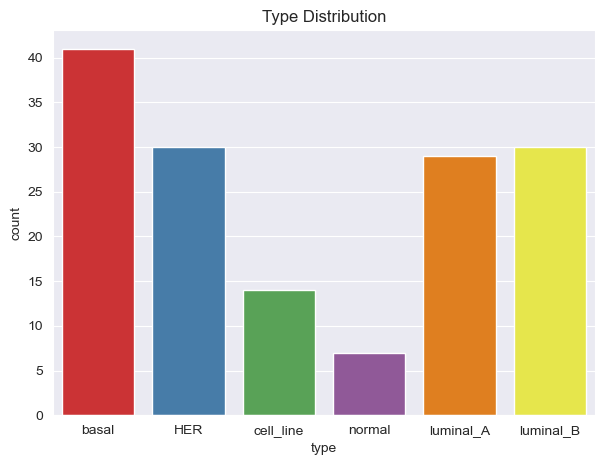

In [13]:
# Visualize the type distribution
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x= "type", hue="type", palette="Set1")
plt.title("Type Distribution")

In [17]:
# Scaling the data
scaler = StandardScaler()
# Separate type and samples
X = df.iloc[:, 2:]
# Standardize the data
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.79956253,  0.66184251,  0.31065541, ...,  0.51588188,
        -0.79712848,  1.26152126],
       [-0.78105222,  0.82416537,  1.30221516, ...,  0.17226811,
         0.43928775, -1.07876515],
       [-0.38504796,  1.85227675, -0.76001854, ..., -0.76591736,
        -0.50659316, -0.15095702],
       ...,
       [ 1.12558961, -0.64056402,  0.12412781, ...,  1.79227194,
         0.03339837,  0.41291911],
       [ 0.17254231, -0.15161854, -0.4048311 , ...,  1.07470717,
         1.01157301, -0.70464582],
       [ 1.64687488, -0.35876085, -0.51875725, ...,  1.53863231,
         1.61144015, -0.43360104]])

In [23]:
# Apply t-SNE on Scaled data

tsne = TSNE(random_state= 42)
tsne_result_scaled = tsne.fit_transform(X_scaled)

In [29]:
# Separate two t-SNE components
xr = tsne_result_scaled[:, 0]
yr = tsne_result_scaled[:, 1]

<Axes: >

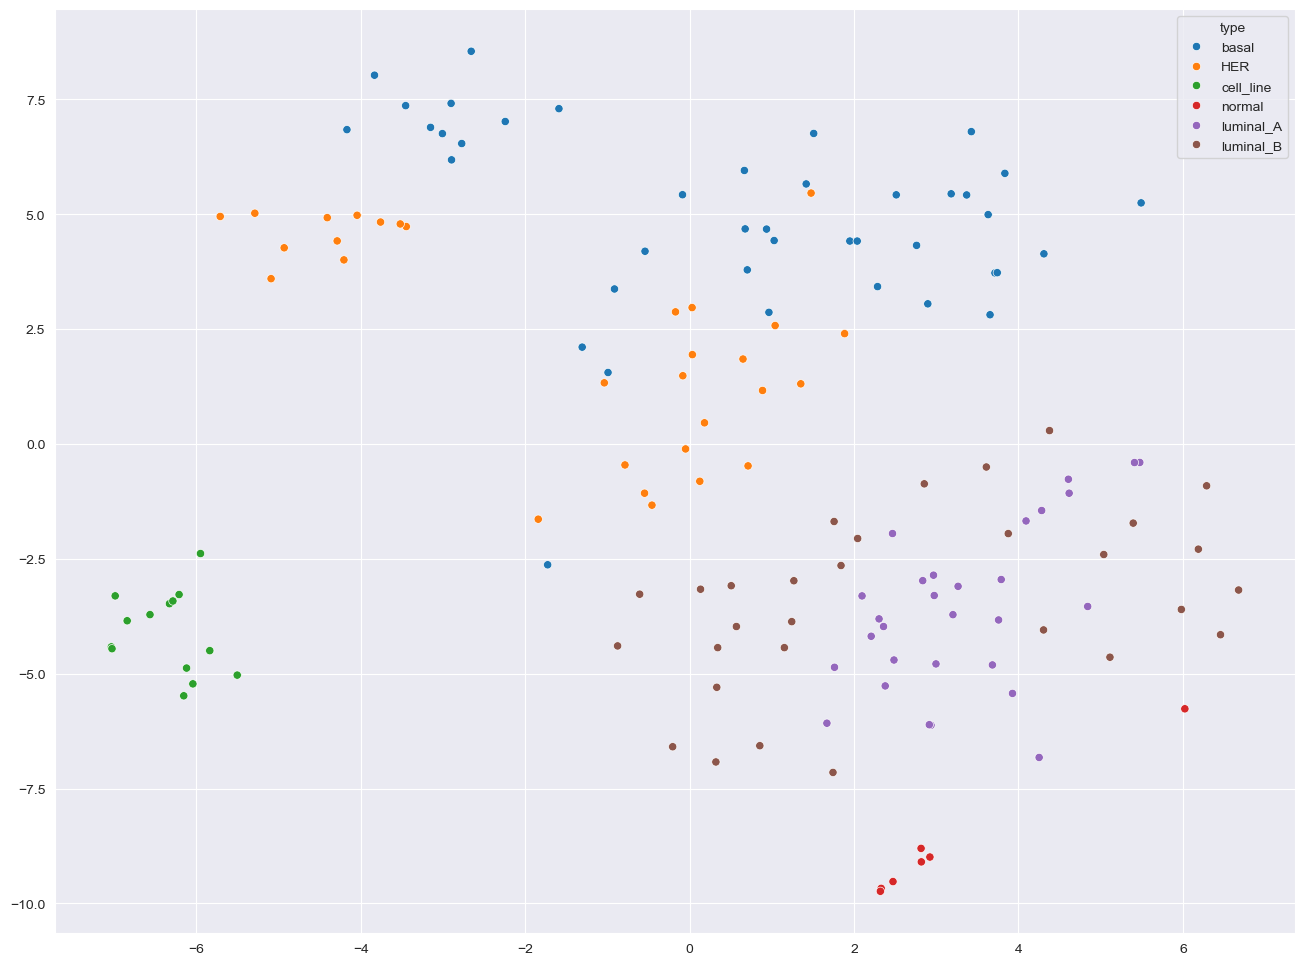

In [25]:
# Visualize the result
plt.figure(figsize=(16, 12))
sns.scatterplot(
    x= xr,
    y= yr,
    hue= df["type"],
    legend= "full"
)

### Key Findings

- **HER** and **basal** are overlapping.
- **luminal_A** and **luminal_B** are overlapping.

Try without scling

In [26]:
# Apply t-SNE on original data
tsne = TSNE(random_state= 42)
tsne_result = tsne.fit_transform(X)

In [32]:
# Separate two t-SNE components
xr = tsne_result[:, 0]
yr = tsne_result[:, 1]

<Axes: >

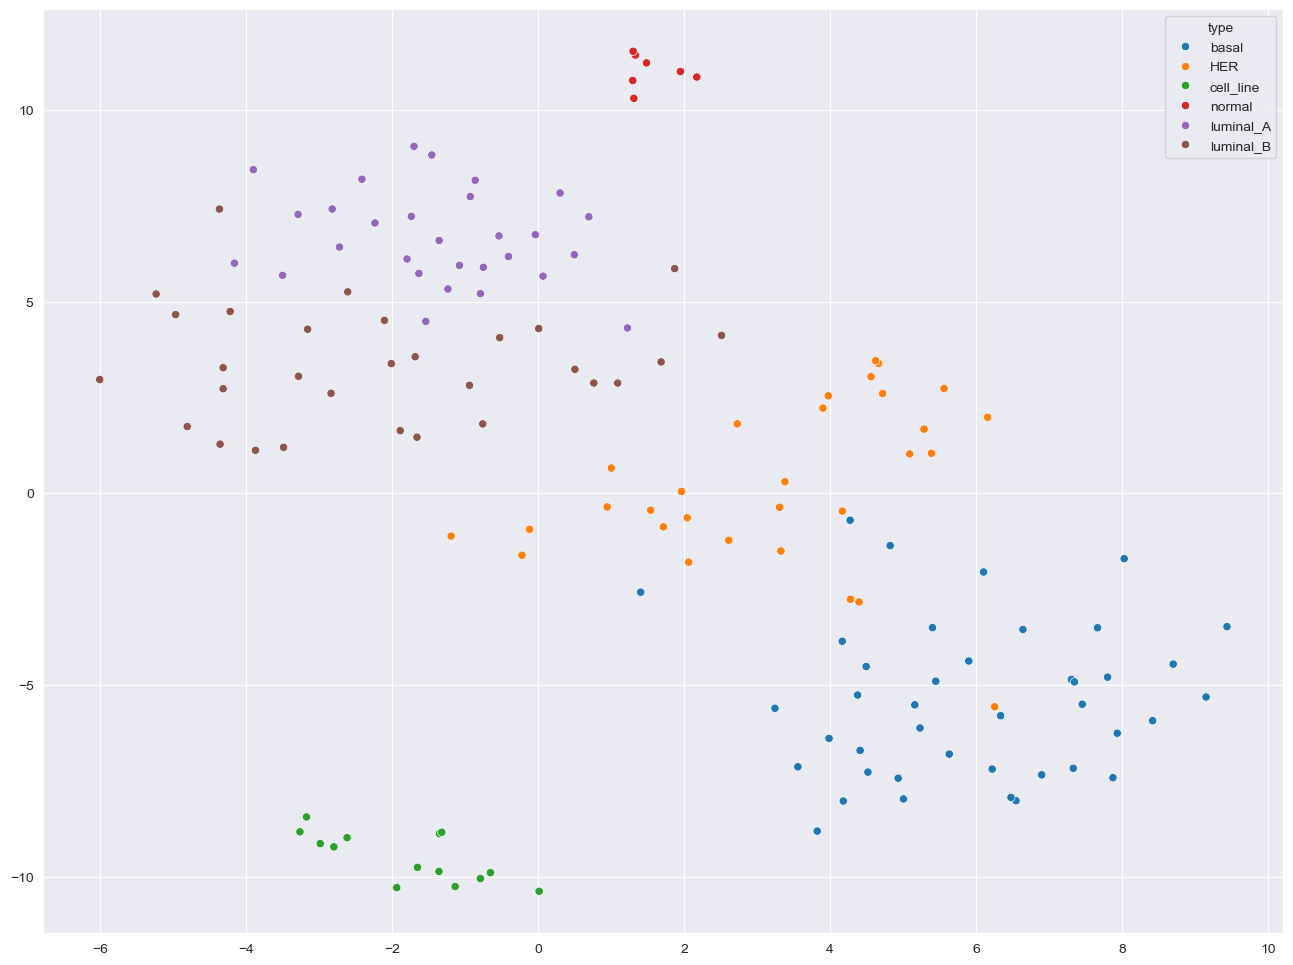

In [33]:
# Visualize the the result with respect to types
plt.figure(figsize=(16, 12))
sns.scatterplot(
    x= xr,
    y = yr,
    hue= df["type"],
    alpha= 1
)

### Key Findings

- After reducing dimension all **6** types of breat cancers are separately showing.